# Bloque 1 - clasificando datos

## construyendo un segundo modelo modeloRandomTree()

Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('prestacar.csv')

In [3]:
X = df.drop(columns='moroso',axis=1)
y = df.moroso

In [4]:
modeloRandomTree = RandomForestClassifier()
modeloRandomTree.fit(X,y)
modeloRandomTree.score(X,y)

0.9999259602036095

In [5]:
print(f'La exactitud del modelo es: {modeloRandomTree.score(X,y)}')

La exactitud del modelo es: 0.9999259602036095


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

In [8]:
modeloRandomTree = RandomForestClassifier()
modeloRandomTree.fit(X_train,y_train)
print(f'La exactitud del modelo en entrenamiento es: {modeloRandomTree.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modeloRandomTree.score(X_val,y_val)}')

La exactitud del modelo en entrenamiento es: 0.9998548199767712
La exactitud del modelo en validacion es: 0.9155996864384636


In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
y_previsto = modeloRandomTree.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[10458    21]
 [  948    54]]


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

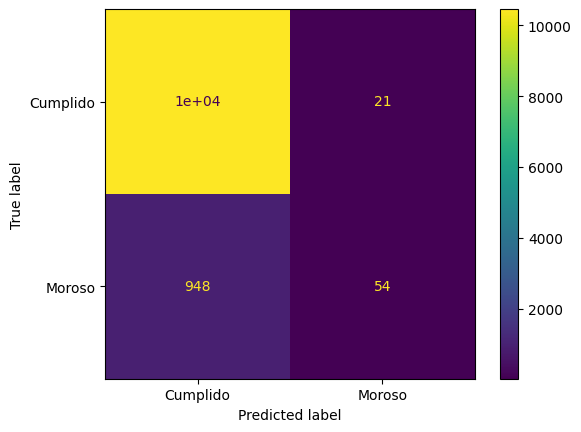

In [12]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

## DecisionTreeClassifier

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

## como comparar

- **TN (True Negative)**: Negativos bien clasificados.

- **FP (False Positive)**: Negativos mal clasificados como positivos.

- **FN (False Negative)**: Positivos mal clasificados como negativos.

- **TP (True Positive)**: Positivos bien clasificados.

Ok, vamos a compararlos paso a paso.

---

## 📊 **Matrices de confusión**

Formato:

```
[[TN  FP]
 [FN  TP]]
```

* **TN (True Negative):** Negativos bien clasificados.
* **FP (False Positive):** Negativos mal clasificados como positivos.
* **FN (False Negative):** Positivos mal clasificados como negativos.
* **TP (True Positive):** Positivos bien clasificados.

---

### **Modelo 1**

```
[[10363   116]
 [  960    42]]
```

* TN = 10363
* FP = 116
* FN = 960
* TP = 42

**Métricas:**

* **Precisión (accuracy):**

  $$
  \frac{TN + TP}{Total} = \frac{10363 + 42}{10363+116+960+42} 
  = \frac{10405}{11481} \approx 0.906
  $$

  → **90.6%**

* **Recall (sensibilidad, clase positiva):**

  $$
  \frac{TP}{TP + FN} = \frac{42}{42+960} \approx 0.041
  $$

  → **4.1%**

* **Precisión (precision, clase positiva):**

  $$
  \frac{TP}{TP + FP} = \frac{42}{42+116} \approx 0.266
  $$

  → **26.6%**

---

### **Modelo 2**

```
[[8890   16]
 [ 806   46]]
```

* TN = 8890
* FP = 16
* FN = 806
* TP = 46

**Métricas:**

* **Precisión (accuracy):**

  $$
  \frac{TN + TP}{Total} = \frac{8890 + 46}{8890+16+806+46} 
  = \frac{8936}{9758} \approx 0.915
  $$

  → **91.5%**

* **Recall (sensibilidad, clase positiva):**

  $$
  \frac{TP}{TP + FN} = \frac{46}{46+806} \approx 0.054
  $$

  → **5.4%**

* **Precisión (precision, clase positiva):**

  $$
  \frac{TP}{TP + FP} = \frac{46}{46+16} \approx 0.742
  $$

  → **74.2%**

---

## 📈 Comparación

| Métrica       | Modelo 1 | Modelo 2  | Mejor    |
| ------------- | -------- | --------- | -------- |
| Accuracy      | 90.6%    | **91.5%** | Modelo 2 |
| Recall (+)    | 4.1%     | **5.4%**  | Modelo 2 |
| Precision (+) | 26.6%    | **74.2%** | Modelo 2 |

---

## 💡 **Conclusión**

**El Modelo 2 es mejor**, porque:

* Tiene **mayor accuracy**.
* Detecta **más verdaderos positivos** (mayor recall).
* Sus predicciones positivas son mucho más confiables (precision altísima de 74.2% frente a 26.6%).

El Modelo 1 tiene más aciertos en negativos, pero es muy malo detectando positivos y comete más falsos positivos.

---

Si quieres, puedo hacerte **la visualización de ambas matrices con `ConfusionMatrixDisplay`** para que se vea la diferencia más clara. ¿Quieres que la prepare?


# Bloque 3

## Validación cruzada

Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificación, para que se elija la métrica más adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de vehículos e identificamos que la métrica más relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las métricas en la validación cruzada así como el [``classification_report``](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), es necesario utilizar el método ``cross_validate`` e informar en el parámetro ``scoring`` las métricas a evaluar.

Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

- Exactitud
- Recall
- Precisión
- F1-score

*Un consejo es explorar la documentación del método ``cross_validate`` a partir de este [material de apoyo](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate), donde puedes descubrir una forma más simple de retornar las métricas de una sola vez con una lista de cadenas.*

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
modeloTree = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modeloTree,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.20343828, 0.19866562, 0.20069289, 0.2664814 , 0.21823668]),
 'score_time': array([0.01312089, 0.        , 0.        , 0.        , 0.01785612]),
 'test_score': array([0.02642008, 0.01980198, 0.01845018, 0.0156658 , 0.02427746])}

In [19]:
listaMetricas=['accuracy','recall','precision','f1']

In [40]:
modeloTree = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados = cross_validate(modeloTree,X,y,cv=kf,scoring=listaMetricas)
cv_resultados

{'fit_time': array([0.25883007, 0.20904517, 0.20009303, 0.19956923, 0.21323299]),
 'score_time': array([0.00322819, 0.00713682, 0.01369476, 0.02024984, 0.01691389]),
 'test_accuracy': array([0.91322809, 0.90690331, 0.90733885, 0.91332753, 0.89993467]),
 'test_recall': array([0.02642008, 0.01980198, 0.0196802 , 0.01697128, 0.02427746]),
 'test_precision': array([0.25      , 0.20253165, 0.22857143, 0.23214286, 0.21875   ]),
 'test_f1': array([0.04778973, 0.03607666, 0.03624009, 0.03163017, 0.04370447])}

In [73]:
def intervalo_confianza(resultados):
    for x in listaMetricas:
        promedio = resultados[f'test_{x}'].mean()
        desvio_std = resultados[f'test_{x}'].std()
        lim_inf = max(promedio - 2 * desvio_std, 0)
        lim_sup = min(promedio + 2 * desvio_std, 1)
        print(f'El intervalo de confianza de {x} es de: [{lim_inf:.4f}, {lim_sup:.4f}]')

In [68]:
modeloTree = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados = cross_validate(modeloTree,X,y,cv=kf,scoring=listaMetricas)
cv_resultados

{'fit_time': array([0.24045849, 0.19234657, 0.19989896, 0.19624305, 0.19937253]),
 'score_time': array([0.01957059, 0.        , 0.0204556 , 0.01709652, 0.        ]),
 'test_accuracy': array([0.91322809, 0.9070122 , 0.90788328, 0.91343641, 0.89906359]),
 'test_recall': array([0.02774108, 0.02227723, 0.0196802 , 0.01436031, 0.02312139]),
 'test_precision': array([0.25609756, 0.2195122 , 0.24615385, 0.21568627, 0.19607843]),
 'test_f1': array([0.05005959, 0.04044944, 0.03644647, 0.02692778, 0.04136505])}

In [72]:
intervalo_confianza(cv_resultados)

El intervalo de confianza de accuracy es de: [0.8976305784957506,0.9186188453679567]
El intervalo de confianza de recall es de: [0.01265194441400974,0.0302201389248518]
El intervalo de confianza de precision es de: [0.1833161171298011,0.27009520612370297]
El intervalo de confianza de f1 es de: [0.024022876640984285,0.0540764566868561]


In [74]:
intervalo_confianza(cv_resultados)

El intervalo de confianza de accuracy es de: [0.8976, 0.9186]
El intervalo de confianza de recall es de: [0.0127, 0.0302]
El intervalo de confianza de precision es de: [0.1833, 0.2701]
El intervalo de confianza de f1 es de: [0.0240, 0.0541]
